In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
file_path = 'data/Data Sensus 2022.xlsx'
data_gen_wil = pd.read_excel(file_path, sheet_name='06 - Data Genereasi')

### Analisis Populasi Berdasarkan Ketegori Generasi

In [4]:
data_gen_wil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provinsi       34 non-null     object
 1   Post Gen Z LK  34 non-null     int64 
 2   Post Gen Z PR  34 non-null     int64 
 3   Gen Z LK       34 non-null     int64 
 4   Gen Z PR       34 non-null     int64 
 5   Milenial LK    34 non-null     int64 
 6   Milenial PR    34 non-null     int64 
 7   Gen X LK       34 non-null     int64 
 8   Gen X PR       34 non-null     int64 
 9   Boomer LK      34 non-null     int64 
 10  Boomer PR      34 non-null     int64 
 11  Pre Boomer LK  34 non-null     int64 
 12  Pre Boomer PR  34 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 3.6+ KB


In [5]:
data_gen_wil.isnull().sum()

Provinsi         0
Post Gen Z LK    0
Post Gen Z PR    0
Gen Z LK         0
Gen Z PR         0
Milenial LK      0
Milenial PR      0
Gen X LK         0
Gen X PR         0
Boomer LK        0
Boomer PR        0
Pre Boomer LK    0
Pre Boomer PR    0
dtype: int64

In [6]:
# Hitung untuk total kategori
totals = {
    'Kategori': [
        'Post Gen Z LK',
        'Post Gen Z PR',
        'Gen Z LK',
        'Gen Z PR',
        'Milenial LK',
        'Milenial PR',
        'Gen X LK',
        'Gen X PR',
        'Boomer LK',
        'Boomer PR',
        'Pre Boomer LK',
        'Pre Boomer PR'
    ],
    'Total Penduduk': [
        data_gen_wil['Post Gen Z LK'].sum(),
        data_gen_wil['Post Gen Z PR'].sum(),
        data_gen_wil['Gen Z LK'].sum(),
        data_gen_wil['Gen Z PR'].sum(),
        data_gen_wil['Milenial LK'].sum(),
        data_gen_wil['Milenial PR'].sum(),
        data_gen_wil['Gen X LK'].sum(),
        data_gen_wil['Gen X PR'].sum(),
        data_gen_wil['Boomer LK'].sum(),
        data_gen_wil['Boomer PR'].sum(),
        data_gen_wil['Pre Boomer LK'].sum(),
        data_gen_wil['Pre Boomer PR'].sum()
    ]
}

# Ubah Menjadi dataframe 
df_totals = pd.DataFrame(totals)

# Tampilkan Dataframe
df_totals

,Kategori,Total Penduduk
0,Post Gen Z LK,18056807
1,Post Gen Z PR,17263282
2,Gen Z LK,36791764
3,Gen Z PR,34717318
4,Milenial LK,35394641
5,Milenial PR,34305331
6,Gen X LK,28333040
7,Gen X PR,28224259
8,Boomer LK,16078115
9,Boomer PR,16414860


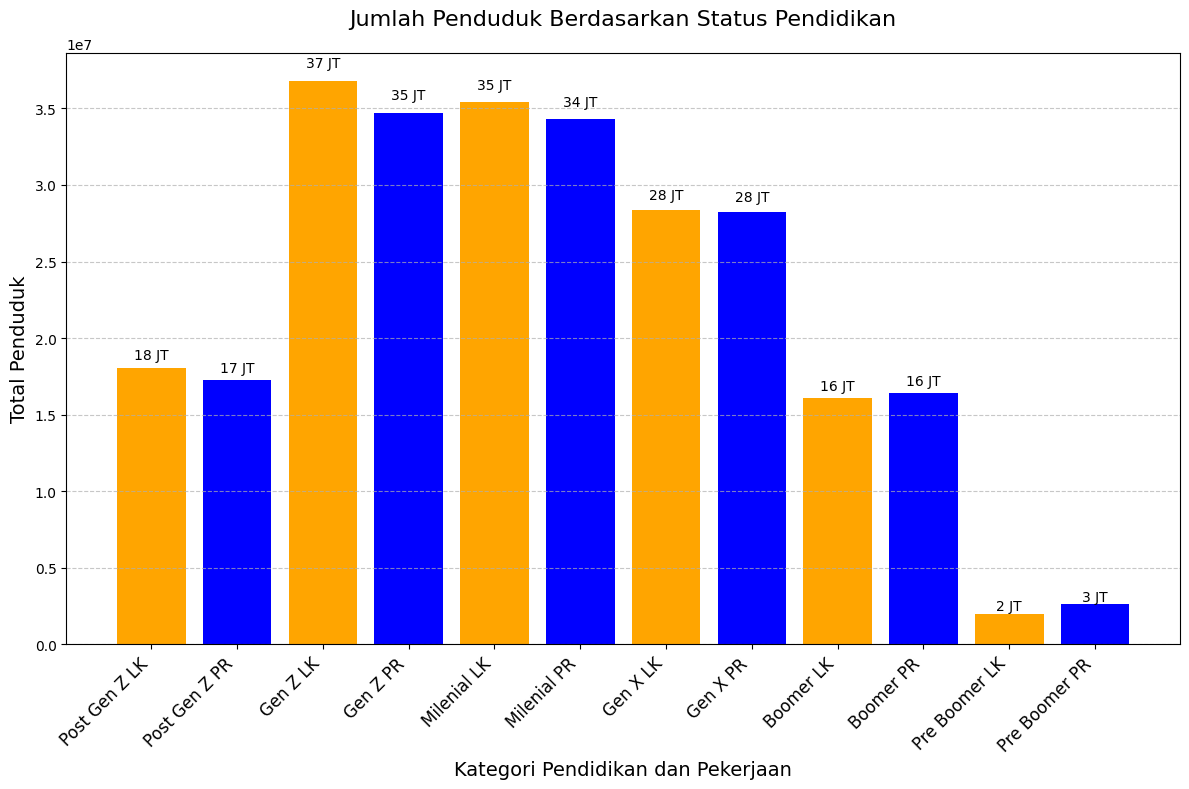

In [7]:
import matplotlib.pyplot as plt

# Fungsi untuk memformat angka dalam format juta
def format_number(value):
    if value >= 1_000_000:
        return f'{value / 1_000_000:.0f} JT'
    return f'{value:.0f}'

# Daftar warna berdasarkan kategori
colors = {
    'LK': 'orange',
    'PR': 'blue'
}

# Mengatur barchart berdasarkan kategori
df_totals['Color'] = df_totals['Kategori'].apply(lambda x: colors['LK'] if 'LK' in x else colors['PR'])

# Plot
plt.figure(figsize=(12, 8))
bars = plt.bar(df_totals['Kategori'], df_totals['Total Penduduk'], color=df_totals['Color'])

# Menambahkan label dan judul
plt.xlabel('Kategori Pendidikan dan Pekerjaan', fontsize=14)
plt.ylabel('Total Penduduk', fontsize=14)
plt.title('Jumlah Penduduk Berdasarkan Status Pendidikan', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotasi label sumbu x 
plt.xticks(rotation=45, ha='right', fontsize=12)

# Menampilkan nilai dengan format juta
for i, value in enumerate(df_totals['Total Penduduk']):
    plt.text(i, value + 0.02 * value, format_number(value), ha='center', va='bottom', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [8]:
totals_kategori = {
    'Kategori': [
        'Post Gen Z',
        'Gen Z',
        'Milenial',
        'Gen X',
        'Boomer',
        'Pre Boomer'
    ],
    'Total Penduduk': [
        data_gen_wil['Post Gen Z LK'].sum() + data_gen_wil['Post Gen Z PR'].sum(),
        data_gen_wil['Gen Z LK'].sum() + data_gen_wil['Gen Z PR'].sum(),
        data_gen_wil['Milenial LK'].sum() + data_gen_wil['Milenial PR'].sum(),
        data_gen_wil['Gen X LK'].sum() + data_gen_wil['Gen X PR'].sum(),
        data_gen_wil['Boomer LK'].sum() + data_gen_wil['Boomer PR'].sum(),
        data_gen_wil['Pre Boomer LK'].sum() + data_gen_wil['Pre Boomer PR'].sum()
    ]
}

# Ubah Menjadi dataframe
df_totals_kategori = pd.DataFrame(totals_kategori)

# Tampilkan Dataframe

df_totals_kategori

,Kategori,Total Penduduk
0,Post Gen Z,35320089
1,Gen Z,71509082
2,Milenial,69699972
3,Gen X,56557299
4,Boomer,32492975
5,Pre Boomer,4624500


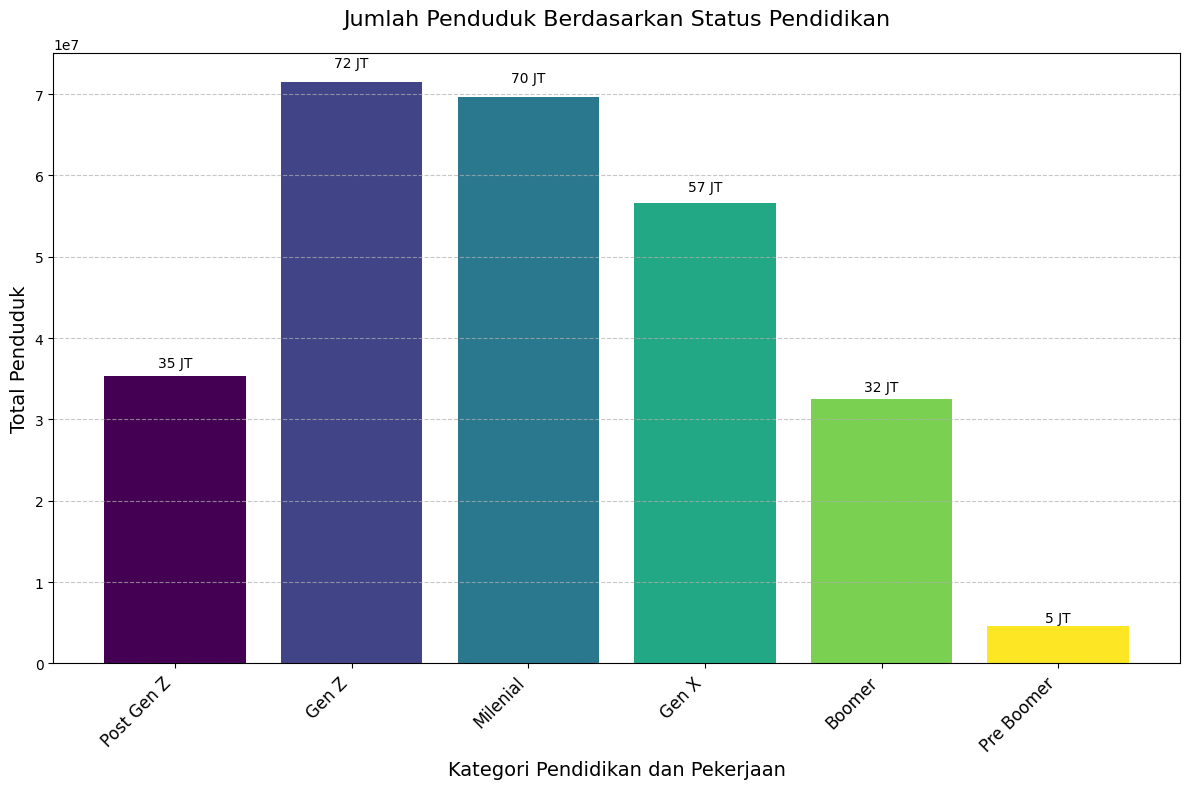

In [8]:
# Fungsi untuk memformat angka dalam format juta
def format_number(value):
    if value >= 1_000_000:
        return f'{value / 1_000_000:.0f} JT'
    return f'{value:.0f}'

# Palet warna
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(df_totals_kategori)))

# Plot
plt.figure(figsize=(12, 8)) 
bars = plt.bar(df_totals_kategori['Kategori'], df_totals_kategori['Total Penduduk'], color=colors)

# Menambahkan label dan judul
plt.xlabel('Kategori Pendidikan dan Pekerjaan', fontsize=14)
plt.ylabel('Total Penduduk', fontsize=14)
plt.title('Jumlah Penduduk Berdasarkan Status Kategori Generasi', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotasi label sumbu x 
plt.xticks(rotation=45, ha='right', fontsize=12)

# Menampilkan nilai dengan format juta
for i, value in enumerate(df_totals_kategori['Total Penduduk']):
    plt.text(i, value + 0.02 * value, format_number(value), ha='center', va='bottom', fontsize=10)

# Menampilkan plot
plt.tight_layout()
plt.show()

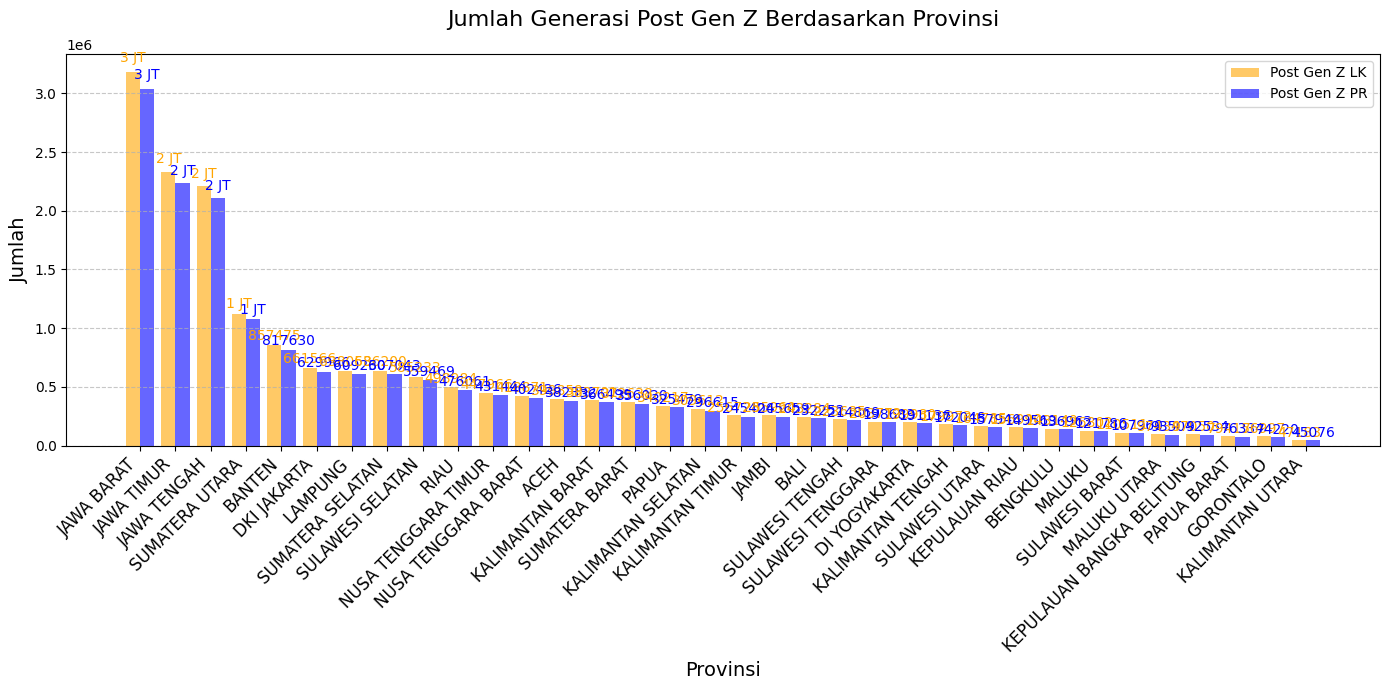

In [9]:
import matplotlib.pyplot as plt

# Filter data untuk Post Gen Z LK dan Post Gen Z PR
post_gen_z_data = data_gen_wil[['Post Gen Z LK', 'Post Gen Z PR', 'Provinsi']]

# Urutkan data berdasarkan Post Gen Z LK
post_gen_z_data_sorted = post_gen_z_data.sort_values(by='Post Gen Z LK', ascending=False)

# Menentukan posisi x
x = range(len(post_gen_z_data_sorted['Provinsi']))

# Mengatur ukuran figure
plt.figure(figsize=(14, 7))

# Buat barplot untuk Post Gen Z LK
plt.bar([p - 0.2 for p in x], post_gen_z_data_sorted['Post Gen Z LK'], color='orange', width=0.4, label='Post Gen Z LK', alpha=0.6, align='center')

# Buat barplot untuk Post Gen Z PR
plt.bar([p + 0.2 for p in x], post_gen_z_data_sorted['Post Gen Z PR'], color='blue', width=0.4, label='Post Gen Z PR', alpha=0.6, align='center')

# Menambahkan label dan judul
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.title('Jumlah Generasi Post Gen Z Berdasarkan Provinsi', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan legend
plt.legend()

# Rotasi label sumbu x
plt.xticks([p for p in x], post_gen_z_data_sorted['Provinsi'], rotation=45, ha='right', fontsize=12)

# Menampilkan nilai di atas bar
for i, (lk, pr) in enumerate(zip(post_gen_z_data_sorted['Post Gen Z LK'], post_gen_z_data_sorted['Post Gen Z PR'])):
    plt.text(i - 0.2, lk + 0.02 * lk, format_number(lk), ha='center', va='bottom', fontsize=10, color='orange')
    plt.text(i + 0.2, pr + 0.02 * pr, format_number(pr), ha='center', va='bottom', fontsize=10, color='blue')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [10]:
# Filter data untuk Post Gen Z LK dan Post Gen Z PR
post_gen_z_data = data_gen_wil[[ 'Provinsi', 'Post Gen Z LK', 'Post Gen Z PR']]

# Urutkan DataFrame berdasarkan kolom 'Post Gen Z LK' dari yang tertinggi
post_gen_z_data_sorted = post_gen_z_data.sort_values(by='Post Gen Z LK', ascending=False)

# Menampilkan DataFrame
post_gen_z_data_sorted.head()

,Provinsi,Post Gen Z LK,Post Gen Z PR
11,JAWA BARAT,3177865,3034970
14,JAWA TIMUR,2333753,2231921
12,JAWA TENGAH,2207035,2105742
1,SUMATERA UTARA,1124077,1074490
15,BANTEN,857475,817630


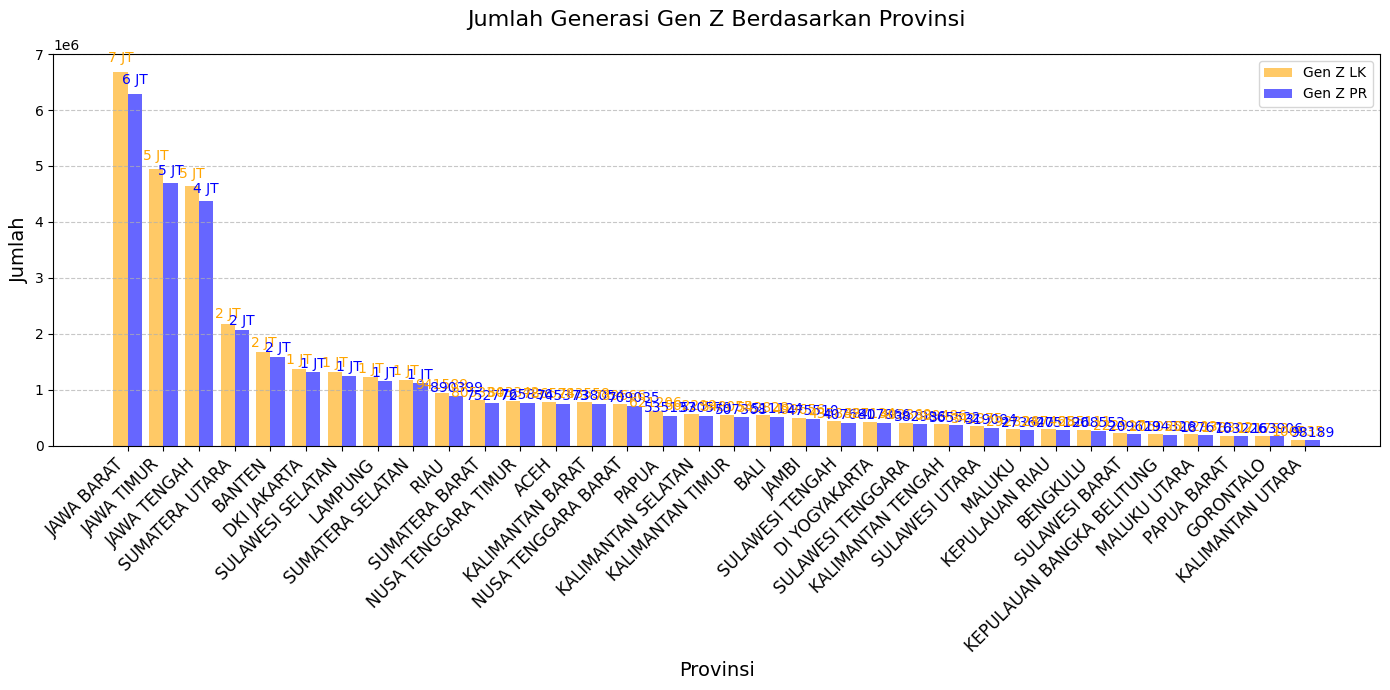

In [17]:
import matplotlib.pyplot as plt

# Filter data untuk Gen Z LK dan Gen Z PR
gen_z_data = data_gen_wil[['Gen Z LK', 'Gen Z PR', 'Provinsi']]

# Urutkan data berdasarkan Gen Z LK
gen_z_data_sorted = gen_z_data.sort_values(by='Gen Z LK', ascending=False)

# Menentukan posisi x 
x = range(len(gen_z_data_sorted['Provinsi']))

# Mengatur ukuran visualisasi
plt.figure(figsize=(14, 7))

# Plot batang untuk Gen Z LK
plt.bar([p - 0.2 for p in x], gen_z_data_sorted['Gen Z LK'], color='orange', width=0.4, label='Gen Z LK', alpha=0.6, align='center')

# Plot batang untuk Gen Z PR
plt.bar([p + 0.2 for p in x], gen_z_data_sorted['Gen Z PR'], color='blue', width=0.4, label='Gen Z PR', alpha=0.6, align='center')

# Menambahkan label dan judul
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.title('Jumlah Generasi Gen Z Berdasarkan Provinsi', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan legend
plt.legend()

# Rotasi label sumbu x 
plt.xticks([p for p in x], gen_z_data_sorted['Provinsi'], rotation=45, ha='right', fontsize=12)

# Menampilkan nilai di atas bar
for i, (lk, pr) in enumerate(zip(gen_z_data_sorted['Gen Z LK'], gen_z_data_sorted['Gen Z PR'])):
    plt.text(i - 0.2, lk + 0.02 * lk, format_number(lk), ha='center', va='bottom', fontsize=10, color='orange')
    plt.text(i + 0.2, pr + 0.02 * pr, format_number(pr), ha='center', va='bottom', fontsize=10, color='blue')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [18]:
# Filter data untuk Gen Z LK dan Gen Z PR
gen_z_data = data_gen_wil[[ 'Provinsi', 'Gen Z LK', 'Gen Z PR']]

# Urutkan DataFrame berdasarkan kolom 'Gen Z LK' dari yang tertinggi
gen_z_data_sorted = gen_z_data.sort_values(by='Gen Z LK', ascending=False)

# Menampilkan DataFrame
post_gen_z_data_sorted.head()

,Provinsi,Gen Z LK,Gen Z PR
11,JAWA BARAT,6672298,6293101
14,JAWA TIMUR,4947764,4695352
12,JAWA TENGAH,4643081,4380649
1,SUMATERA UTARA,2180254,2061005
15,BANTEN,1679741,1584594


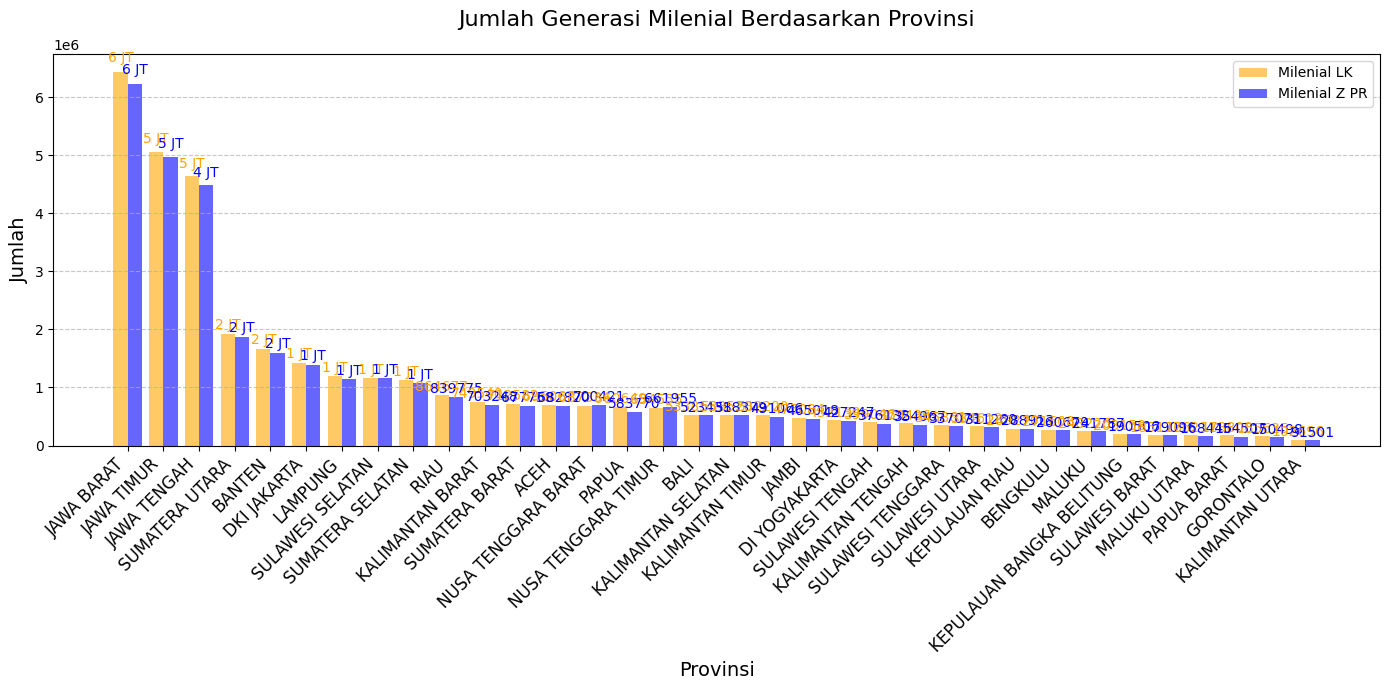

In [19]:
import matplotlib.pyplot as plt

# Filter data untuk Milenial LK dan Milenial PR
milenial_data = data_gen_wil[['Milenial LK', 'Milenial PR', 'Provinsi']]

# Urutkan data berdasarkan Milenial LK
milenial_data_sorted = milenial_data.sort_values(by='Milenial LK', ascending=False)

# Menentukan posisi x 
x = range(len(milenial_data_sorted['Provinsi']))

# Mengatur ukuran figure
plt.figure(figsize=(14, 7))

# Plot batang untuk Milenial LK
plt.bar([p - 0.2 for p in x], milenial_data_sorted['Milenial LK'], color='orange', width=0.4, label='Milenial LK', alpha=0.6, align='center')

# Plot batang untuk Milenial PR
plt.bar([p + 0.2 for p in x], milenial_data_sorted['Milenial PR'], color='blue', width=0.4, label='Milenial Z PR', alpha=0.6, align='center')

# Menambahkan label dan judul
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.title('Jumlah Generasi Milenial Berdasarkan Provinsi', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan legend
plt.legend()

# Rotasi label sumbu x 
plt.xticks([p for p in x], milenial_data_sorted['Provinsi'], rotation=45, ha='right', fontsize=12)

# Menampilkan nilai di atas barchart
for i, (lk, pr) in enumerate(zip(milenial_data_sorted['Milenial LK'], milenial_data_sorted['Milenial PR'])):
    plt.text(i - 0.2, lk + 0.02 * lk, format_number(lk), ha='center', va='bottom', fontsize=10, color='orange')
    plt.text(i + 0.2, pr + 0.02 * pr, format_number(pr), ha='center', va='bottom', fontsize=10, color='blue')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [20]:
# Filter data untuk Milenial LK dan Milenial PR
milenial_data = data_gen_wil[[ 'Provinsi', 'Milenial LK', 'Milenial PR']]

# Urutkan DataFrame berdasarkan kolom Milenial LK
milenial_data_sorted = milenial_data.sort_values(by='Milenial LK', ascending=False)

# Menampilkan DataFrame
milenial_data_sorted.head()

,Provinsi,Milenial LK,Milenial PR
11,JAWA BARAT,6424493,6228842
14,JAWA TIMUR,5053738,4974272
12,JAWA TENGAH,4639273,4485773
1,SUMATERA UTARA,1924391,1867146
15,BANTEN,1658104,1599997


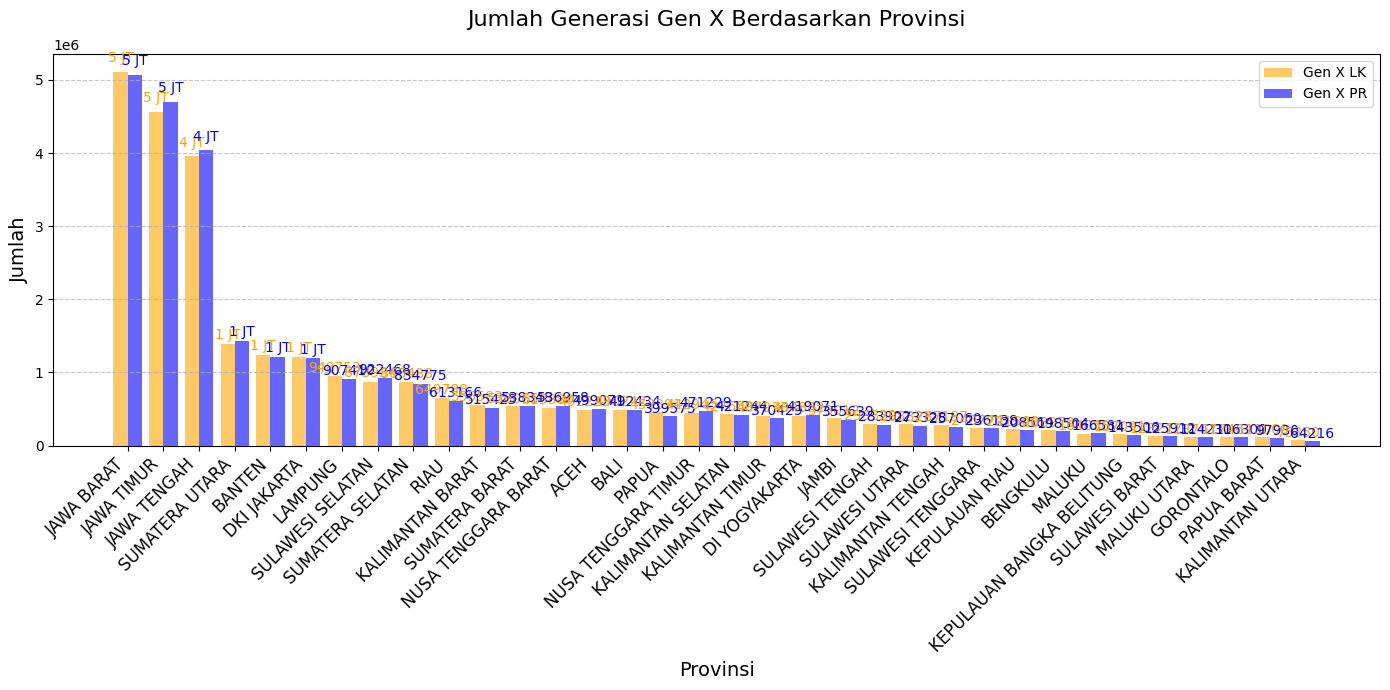

In [23]:
import matplotlib.pyplot as plt

# Filter data untuk Post Gen X LK dan Gen X PR
gen_x_data = data_gen_wil[['Gen X LK', 'Gen X PR', 'Provinsi']]

# Urutkan data berdasarkan Gen X LK
gen_x_data_sorted = gen_x_data.sort_values(by='Gen X LK', ascending=False)

# Menentukan posisi x untuk batang
x = range(len(gen_x_data_sorted['Provinsi']))

# Mengatur ukuran visualisasi
plt.figure(figsize=(14, 7))

# Plot batang untuk Gen X LK
plt.bar([p - 0.2 for p in x], gen_x_data_sorted['Gen X LK'], color='orange', width=0.4, label='Gen X LK', alpha=0.6, align='center')

# Plot batang untuk Gen X PR
plt.bar([p + 0.2 for p in x], gen_x_data_sorted['Gen X PR'], color='blue', width=0.4, label='Gen X PR', alpha=0.6, align='center')

# Menambahkan label dan judul
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.title('Jumlah Generasi Gen X Berdasarkan Provinsi', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan legend
plt.legend()

# Rotasi label sumbu x
plt.xticks([p for p in x], gen_x_data_sorted['Provinsi'], rotation=45, ha='right', fontsize=12)

# Menampilkan nilai di atas barchart
for i, (lk, pr) in enumerate(zip(gen_x_data_sorted['Gen X LK'], gen_x_data_sorted['Gen X PR'])):
    plt.text(i - 0.2, lk + 0.02 * lk, format_number(lk), ha='center', va='bottom', fontsize=10, color='orange')
    plt.text(i + 0.2, pr + 0.02 * pr, format_number(pr), ha='center', va='bottom', fontsize=10, color='blue')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [26]:
# Filter data untuk Post Gen X LK dan Gen X PR
gen_x_data = data_gen_wil[[ 'Provinsi', 'Gen X LK', 'Gen X PR']]

# Urutkan DataFrame berdasarkan kolom 'Gen X LK' secara menurun
gen_x_data_sorted = gen_x_data.sort_values(by='Gen X LK', ascending=False)

# Menampilkan DataFrame
gen_x_data_sorted.head()

,Provinsi,Gen X LK,Gen X PR
11,JAWA BARAT,5103330,5065736
14,JAWA TIMUR,4563699,4699451
12,JAWA TENGAH,3966057,4046033
1,SUMATERA UTARA,1387964,1426692
15,BANTEN,1242418,1212065


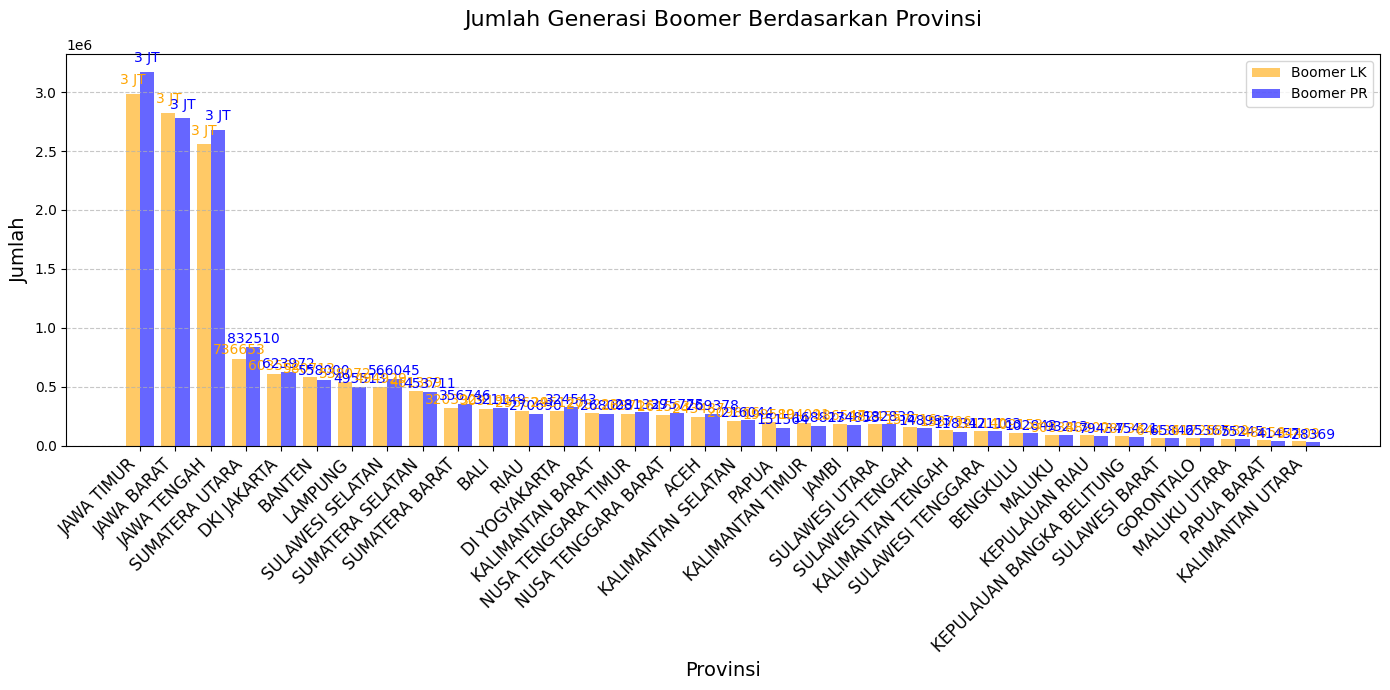

In [27]:
import matplotlib.pyplot as plt

# Filter data untuk Boomer PR dan Boomer LK
boomer_data = data_gen_wil[['Boomer LK', 'Boomer PR', 'Provinsi']]

# Urutkan data berdasarkan Boomer LK
boomer_data_sorted = boomer_data.sort_values(by='Boomer LK', ascending=False)

# Menentukan posisi x
x = range(len(boomer_data_sorted['Provinsi']))

# Mengatur ukuran visualisasi
plt.figure(figsize=(14, 7))

# Plot batang untuk Boomer LK
plt.bar([p - 0.2 for p in x], boomer_data_sorted['Boomer LK'], color='orange', width=0.4, label='Boomer LK', alpha=0.6, align='center')

# Plot batang untuk Boomer PR
plt.bar([p + 0.2 for p in x], boomer_data_sorted['Boomer PR'], color='blue', width=0.4, label='Boomer PR', alpha=0.6, align='center')

# Menambahkan label dan judul
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.title('Jumlah Generasi Boomer Berdasarkan Provinsi', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan legend
plt.legend()

# Rotasi label sumbu x
plt.xticks([p for p in x], boomer_data_sorted['Provinsi'], rotation=45, ha='right', fontsize=12)

# Menampilkan nilai di atas barchart
for i, (lk, pr) in enumerate(zip(boomer_data_sorted['Boomer LK'], boomer_data_sorted['Boomer PR'])):
    plt.text(i - 0.2, lk + 0.02 * lk, format_number(lk), ha='center', va='bottom', fontsize=10, color='orange')
    plt.text(i + 0.2, pr + 0.02 * pr, format_number(pr), ha='center', va='bottom', fontsize=10, color='blue')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [28]:
# Filter data untuk Boomer LK dan Boomer PR
boomer_data = data_gen_wil[[ 'Provinsi', 'Boomer LK', 'Boomer PR']]

# Urutkan DataFrame berdasarkan kolom 'Boomer LK' dari yang tertinggi
boomer_data_sorted = boomer_data.sort_values(by='Boomer PR', ascending=False)

# Menampilkan DataFrame
boomer_data_sorted.head()

,Provinsi,Boomer LK,Boomer PR
14,JAWA TIMUR,2986378,3168176
11,JAWA BARAT,2823684,2777211
12,JAWA TENGAH,2558819,2682283
1,SUMATERA UTARA,736653,832510
10,DKI JAKARTA,603562,623972


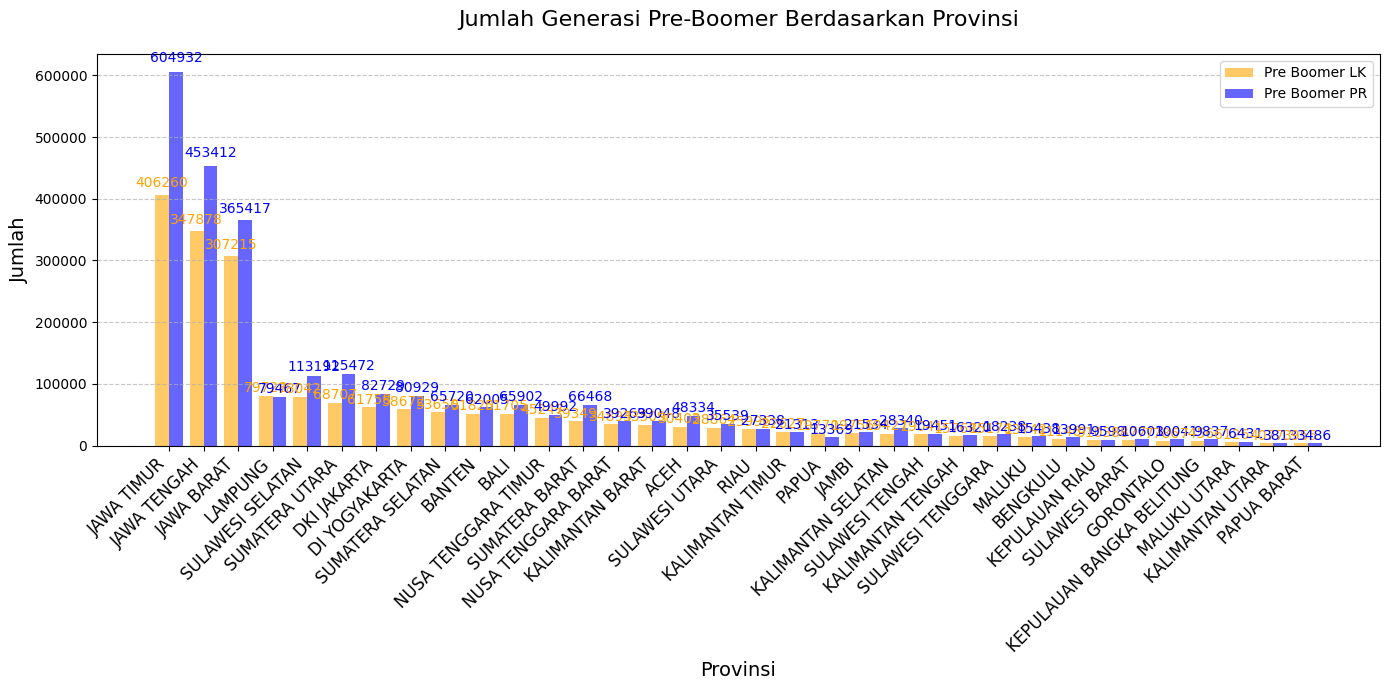

In [29]:
import matplotlib.pyplot as plt

# Filter data untuk Pre Boomer 
pre_boomer_data = data_gen_wil[['Pre Boomer LK', 'Pre Boomer PR', 'Provinsi']]

# Urutkan data berdasarkan Pre Boomer LK
pre_boomer_data_sorted = pre_boomer_data.sort_values(by='Pre Boomer LK', ascending=False)

# Menentukan posisi x
x = range(len(pre_boomer_data_sorted['Provinsi']))

# Mengatur ukuran figure
plt.figure(figsize=(14, 7))

# Plot batang untuk Pre Boomer
plt.bar([p - 0.2 for p in x], pre_boomer_data_sorted['Pre Boomer LK'], color='orange', width=0.4, label='Pre Boomer LK', alpha=0.6, align='center')

# Plot batang untuk Post Gen Z PR
plt.bar([p + 0.2 for p in x], pre_boomer_data_sorted['Pre Boomer PR'], color='blue', width=0.4, label='Pre Boomer PR', alpha=0.6, align='center')

# Menambahkan label dan judul
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.title('Jumlah Generasi Pre-Boomer Berdasarkan Provinsi', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan legend
plt.legend()

# Rotasi label sumbu x 
plt.xticks([p for p in x], pre_boomer_data_sorted['Provinsi'], rotation=45, ha='right', fontsize=12)

# Menampilkan nilai di atas barchart
for i, (lk, pr) in enumerate(zip(pre_boomer_data_sorted['Pre Boomer LK'], pre_boomer_data_sorted['Pre Boomer PR'])):
    plt.text(i - 0.2, lk + 0.02 * lk, format_number(lk), ha='center', va='bottom', fontsize=10, color='orange')
    plt.text(i + 0.2, pr + 0.02 * pr, format_number(pr), ha='center', va='bottom', fontsize=10, color='blue')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [31]:
# Filter data untuk Pre Boomer LK dan Pre Boomer PR
pre_boomer_data = data_gen_wil[[ 'Provinsi', 'Pre Boomer LK', 'Pre Boomer PR']]

# Urutkan DataFrame berdasarkan kolom 'Pre Boomer LK' dari yang tertinggi
pre_boomer_data_sorted = pre_boomer_data.sort_values(by='Pre Boomer PR', ascending=False)

# Menampilkan DataFrame
pre_boomer_data_sorted.head()

,Provinsi,Pre Boomer LK,Pre Boomer PR
14,JAWA TIMUR,406260,604932
12,JAWA TENGAH,347878,453412
11,JAWA BARAT,307215,365417
1,SUMATERA UTARA,68707,115472
26,SULAWESI SELATAN,78042,113192


### Analisis Status Hubungan Kekeluargaan di Indonesia

In [34]:
file_path = 'data/Data Sensus 2022.xlsx'
data_kasus_pernikahan = pd.read_excel(file_path, sheet_name='09 - Kasus Pernikahan')

In [35]:
data_kasus_pernikahan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provinsi     34 non-null     object
 1   Nikah        34 non-null     int64 
 2   Cerai Talak  34 non-null     int64 
 3   Cerai Gugat  34 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [36]:
data_kasus_pernikahan.isnull().sum()

Provinsi       0
Nikah          0
Cerai Talak    0
Cerai Gugat    0
dtype: int64

In [37]:
totals = {
    'Status' : [
        'Nikah',
        'Cerai Talak',
        'Cerai Gugat'
    ],
    'Total Penduduk': [
        data_kasus_pernikahan['Nikah'].sum(),
        data_kasus_pernikahan['Cerai Talak'].sum(),
        data_kasus_pernikahan['Cerai Gugat'].sum()
    ]
}

# Ubah Menjadi dataframe
df_totals = pd.DataFrame(totals)

# Tampilkanan dataframe
df_totals

,Status,Total Penduduk
0,Nikah,1705348
1,Cerai Talak,127986
2,Cerai Gugat,388358


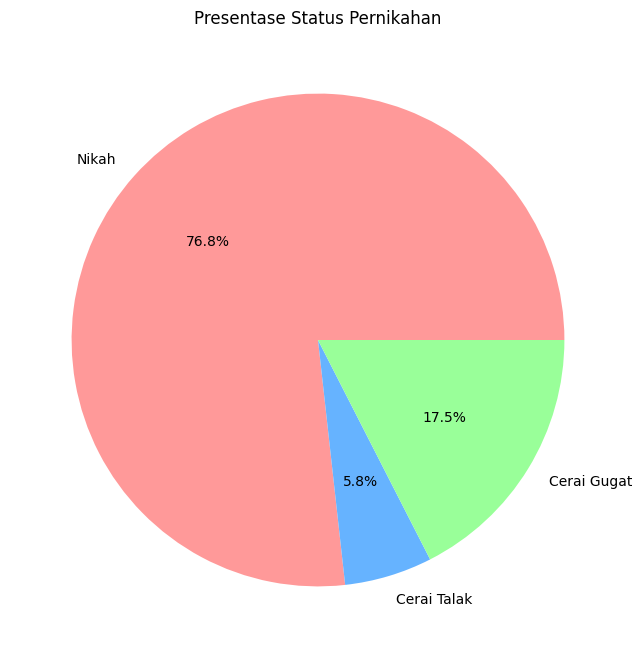

In [39]:
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_totals['Total Penduduk'], labels=df_totals['Status'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Presentase Status Pernikahan')
plt.show()

In [40]:
totals = {
    'Status' : [
        'Nikah',
        'Cerai'
    ],
    'Total Penduduk': [
        data_kasus_pernikahan['Nikah'].sum(),
        data_kasus_pernikahan['Cerai Talak'].sum() + data_kasus_pernikahan['Cerai Gugat'].sum()
    ]
}

# Ubah Menjadi dataframe
df_totals_count = pd.DataFrame(totals)

# Tampilkanan dataframe
df_totals_count

,Status,Total Penduduk
0,Nikah,1705348
1,Cerai,516344


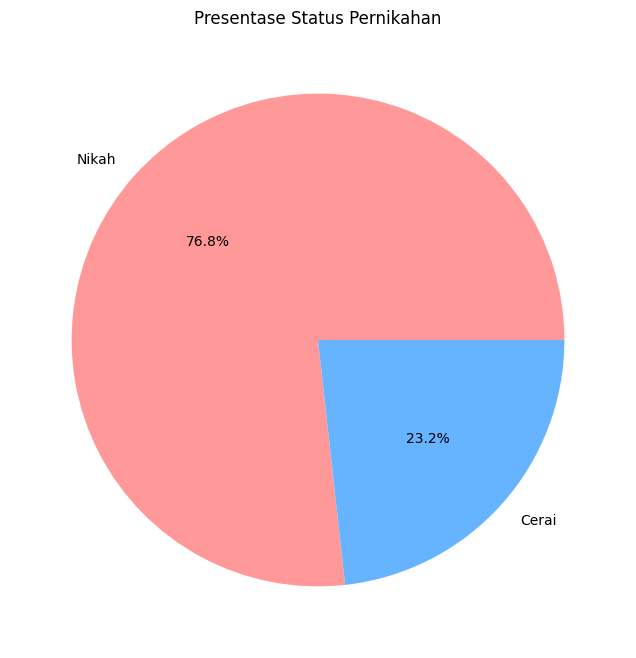

In [41]:
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_totals_count['Total Penduduk'], labels=df_totals_count['Status'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Presentase Status Pernikahan')
plt.show()

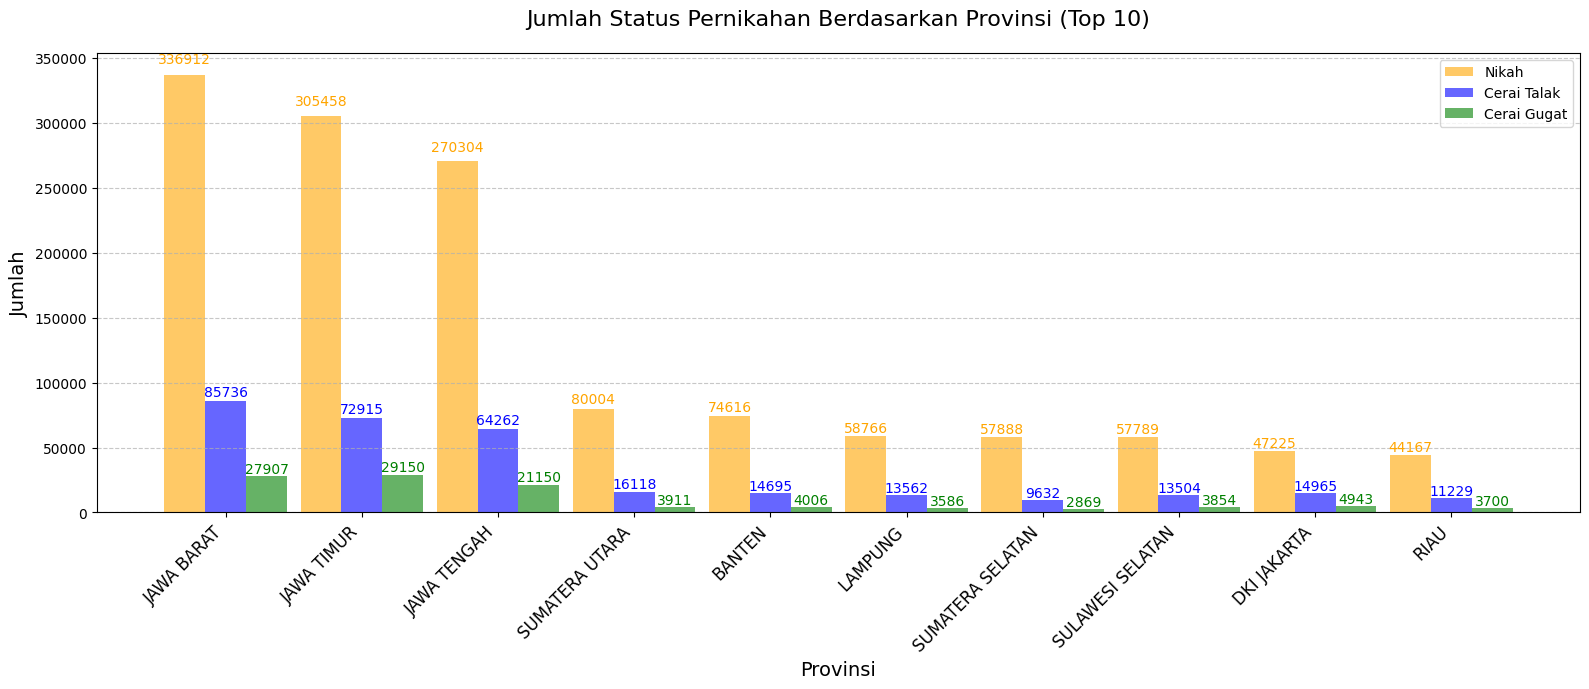

In [42]:
# Filter data untuk Nikah, Cerai Talak, dan Cerai Gugat
data_kasus_pernikahan = data_kasus_pernikahan[['Nikah', 'Cerai Talak', 'Cerai Gugat', 'Provinsi']]

# Urutkan DataFrame berdasarkan kolom 'Nikah' secara menurun dan ambil 10 teratas
data_kasus_pernikahan_sorted = data_kasus_pernikahan.sort_values(by='Nikah', ascending=False).head(10)

# Menentukan posisi x untuk batang
x = range(len(data_kasus_pernikahan_sorted['Provinsi']))

# Mengatur ukuran figure
plt.figure(figsize=(16, 7))

# Plot batang untuk Nikah
plt.bar([p - 0.3 for p in x], data_kasus_pernikahan_sorted['Nikah'], color='orange', width=0.3, label='Nikah', alpha=0.6, align='center')

# Plot batang untuk Cerai Talak
plt.bar([p for p in x], data_kasus_pernikahan_sorted['Cerai Gugat'], color='blue', width=0.3, label='Cerai Talak', alpha=0.6, align='center')

# Plot batang untuk Cerai Gugat
plt.bar([p + 0.3 for p in x], data_kasus_pernikahan_sorted['Cerai Talak'], color='green', width=0.3, label='Cerai Gugat', alpha=0.6, align='center')

# Menambahkan label dan judul
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.title('Jumlah Status Pernikahan Berdasarkan Provinsi (Top 10)', fontsize=16, pad=20)

# Menambahkan grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan legend
plt.legend()

# Rotasi label sumbu x 
plt.xticks([p for p in x], data_kasus_pernikahan_sorted['Provinsi'], rotation=45, ha='right', fontsize=12)

# Menampilkan nilai di atas barchart
for i, (nikah, cerai_talak, cerai_gugat) in enumerate(zip(data_kasus_pernikahan_sorted['Nikah'], data_kasus_pernikahan_sorted['Cerai Gugat'], data_kasus_pernikahan_sorted['Cerai Talak'])):
    plt.text(i - 0.3, nikah + 0.02 * nikah, format_number(nikah), ha='center', va='bottom', fontsize=10, color='orange')
    plt.text(i, cerai_talak + 0.02 * cerai_talak, format_number(cerai_talak), ha='center', va='bottom', fontsize=10, color='blue')
    plt.text(i + 0.3, cerai_gugat + 0.02 * cerai_gugat, format_number(cerai_gugat), ha='center', va='bottom', fontsize=10, color='green')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [43]:
# Filter data untuk data_kesus_pernikahan
data_kasus_pernikahan = data_kasus_pernikahan[[ 'Provinsi', 'Nikah', 'Cerai Gugat', 'Cerai Talak']]

# Urutkan DataFrame berdasarkan kolom 'Nikah' dari yang tertinggi
data_kasus_pernikahan_sorted = data_kasus_pernikahan.sort_values(by='Nikah', ascending=False)

# Menampilkan DataFrame
data_kasus_pernikahan_sorted.head()

,Provinsi,Nikah,Cerai Gugat,Cerai Talak
11,JAWA BARAT,336912,85736,27907
14,JAWA TIMUR,305458,72915,29150
12,JAWA TENGAH,270304,64262,21150
1,SUMATERA UTARA,80004,16118,3911
15,BANTEN,74616,14695,4006


### Analisis Tingkat Umur Kelahiran Penduduk di Indonesia

In [44]:
file_path = 'data/Data Sensus 2022.xlsx'
data_kelahiran = pd.read_excel(file_path, sheet_name='05 - Data Kelahiran')

In [45]:
data_kelahiran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Klasifikasi Kelompok Umur  9 non-null      object
 1   1 Anak                     9 non-null      int64 
 2   2 Anak                     9 non-null      int64 
 3   3 Anak                     9 non-null      int64 
 4   4 Anak                     9 non-null      int64 
 5   5 Anak                     9 non-null      int64 
 6   6 Anak                     9 non-null      int64 
 7   7 Anak                     9 non-null      int64 
 8   8 Anak                     9 non-null      int64 
 9   9 Anak                     9 non-null      int64 
 10  > 10 Anak                  9 non-null      int64 
 11  Keguguran                  9 non-null      int64 
dtypes: int64(11), object(1)
memory usage: 996.0+ bytes


In [46]:
data_kelahiran.head()

,Klasifikasi Kelompok Umur,1 Anak,2 Anak,3 Anak,4 Anak,5 Anak,6 Anak,7 Anak,8 Anak,9 Anak,> 10 Anak,Keguguran
0,10-14,1630,235,6,0,0,0,0,0,0,0,10730557
1,15-19,195604,15005,744,74,0,0,0,0,0,0,10519155
2,20-24,2227746,491547,51060,6004,835,196,0,0,0,0,8159938
3,25-29,4008990,2684811,465938,71884,11871,2737,602,107,0,0,3731007
4,30-34,2707199,4689514,1500050,327327,70591,18291,5112,1797,407,356,1530754


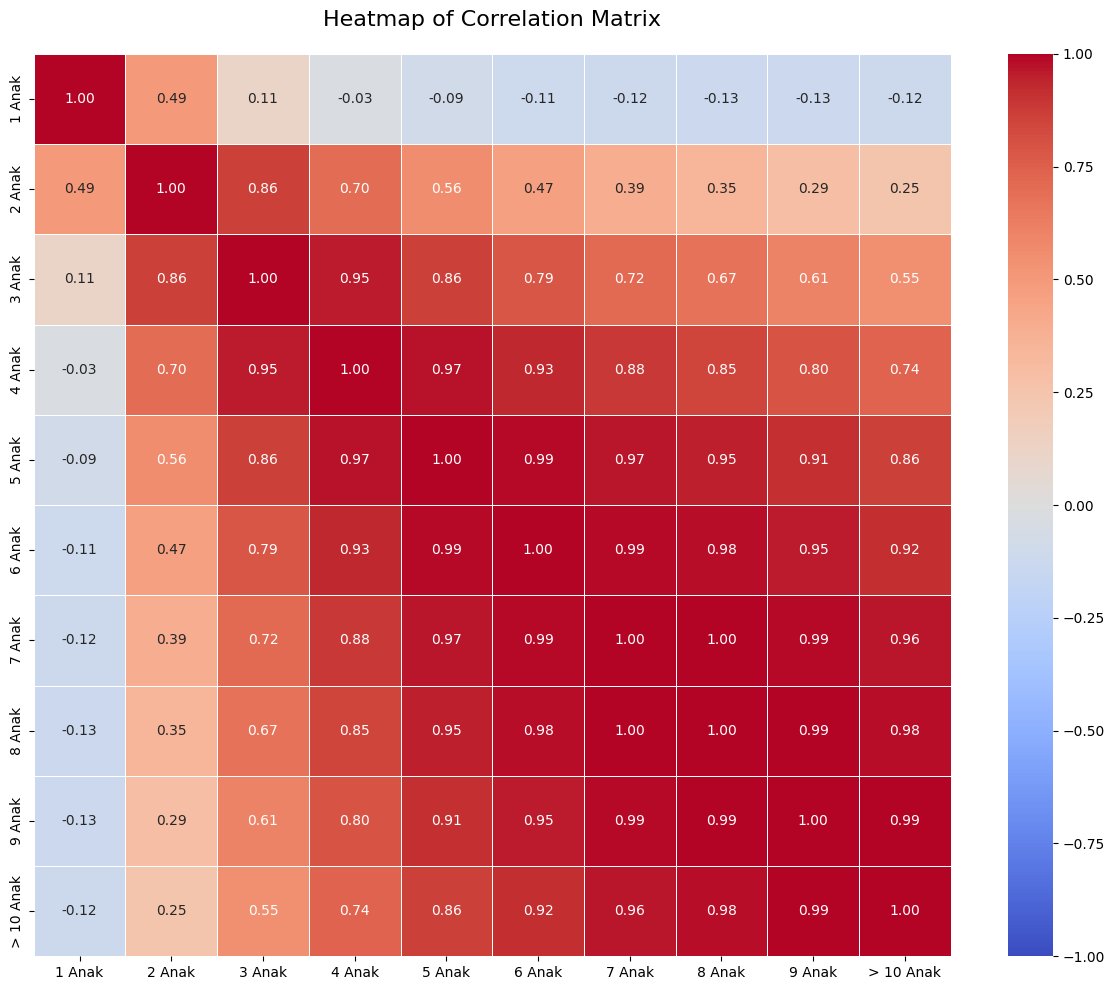

In [47]:
data_kelahiran_cor = data_kelahiran[['1 Anak', '2 Anak', '3 Anak', '4 Anak', '5 Anak', '6 Anak', '7 Anak', '8 Anak', '9 Anak', '> 10 Anak']]

# Calculate the correlation matrix
correlation_matrix = data_kelahiran_cor.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Set the title
plt.title('Heatmap of Correlation Matrix', fontsize=16, pad=20)

# Display the heatmap
plt.tight_layout()
plt.show()

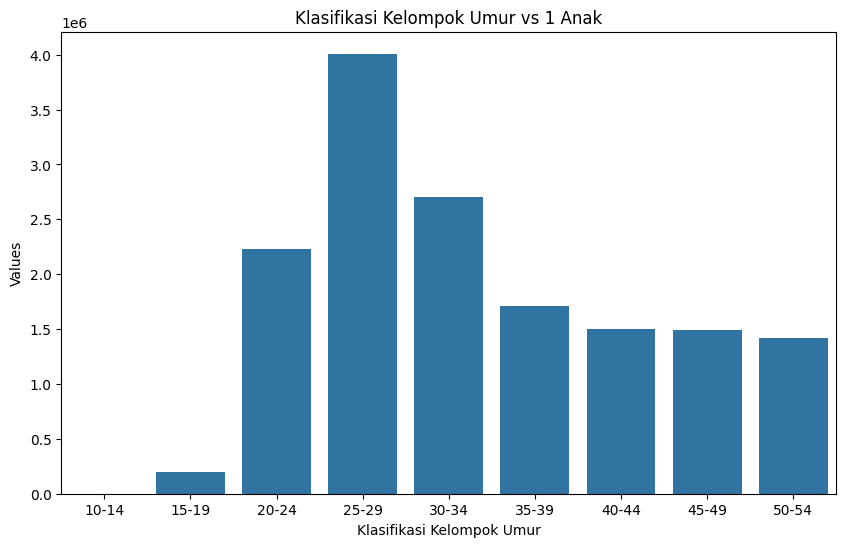

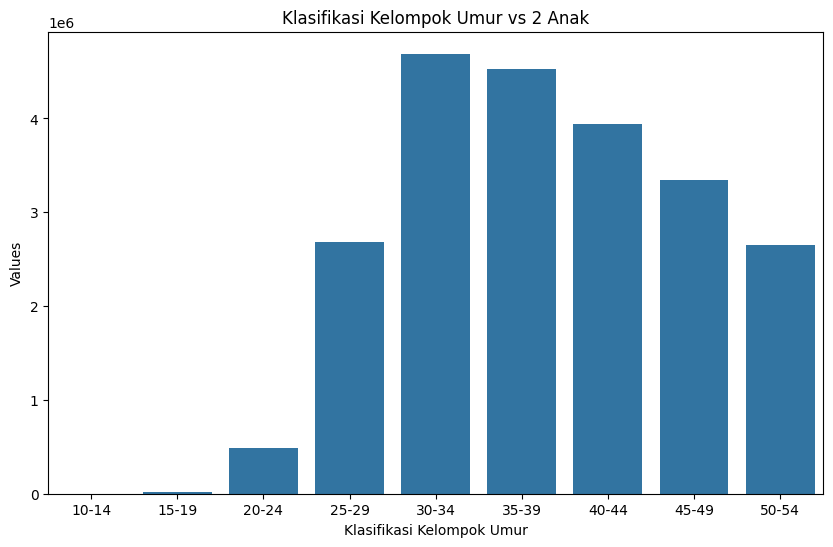

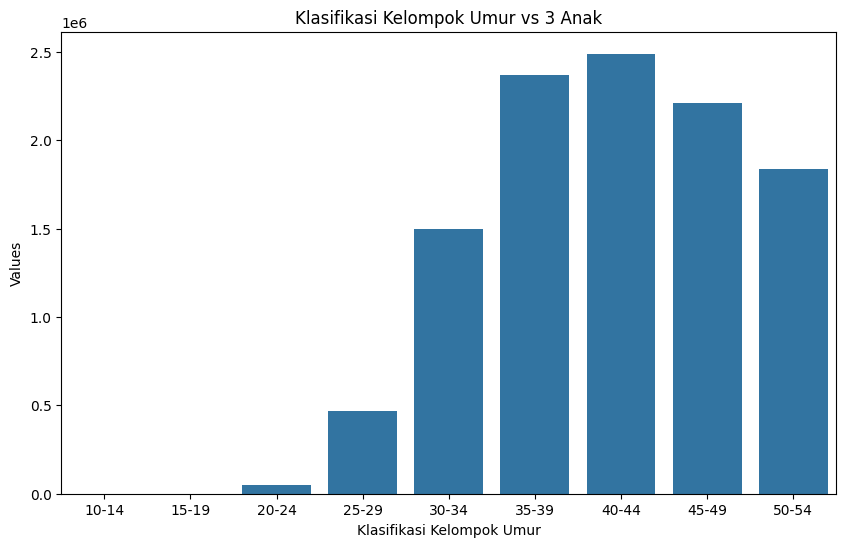

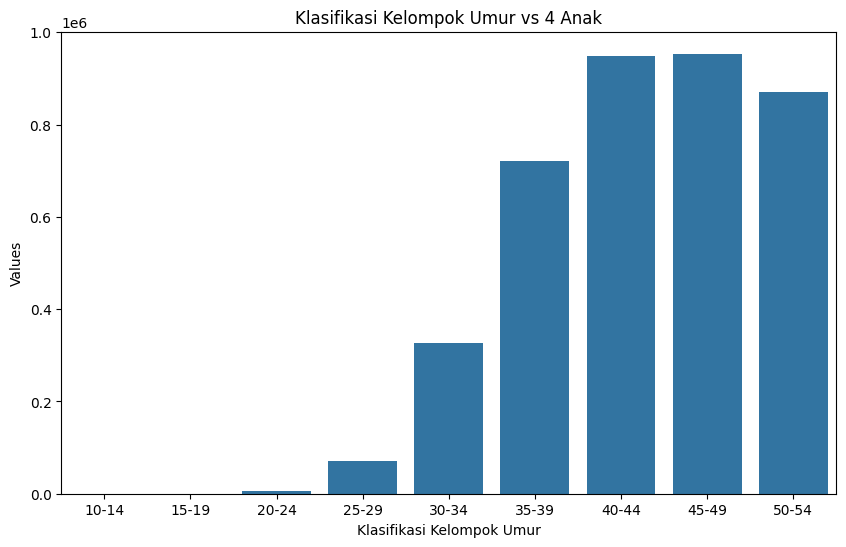

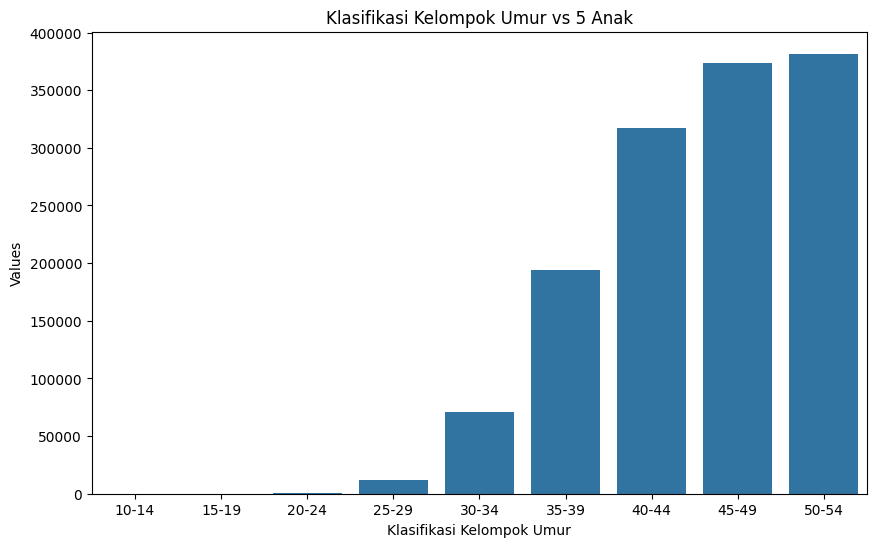

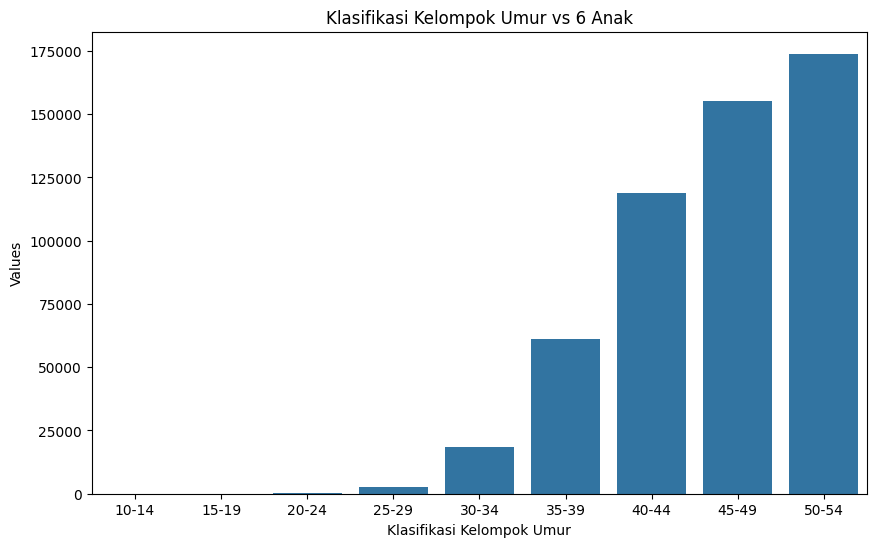

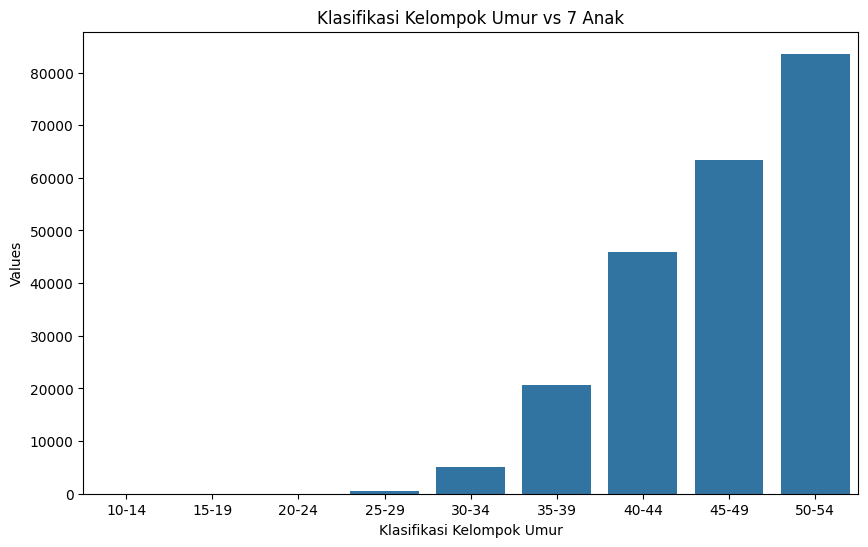

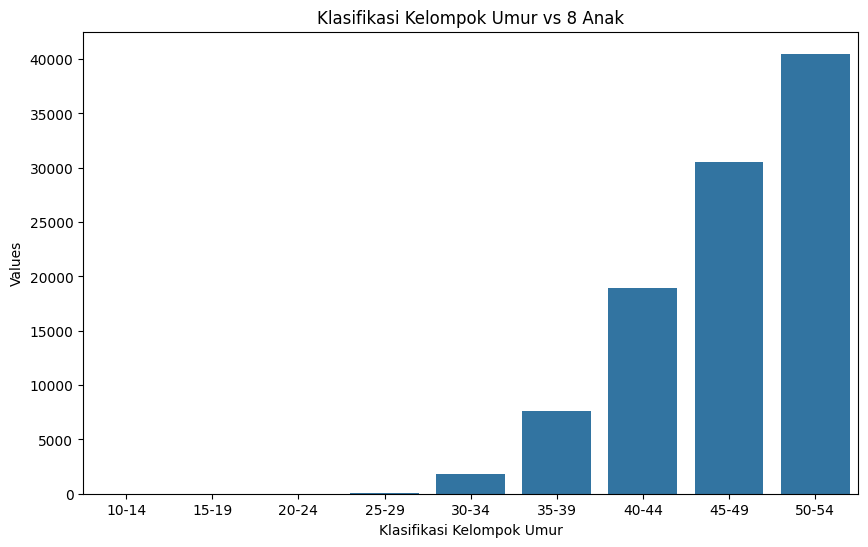

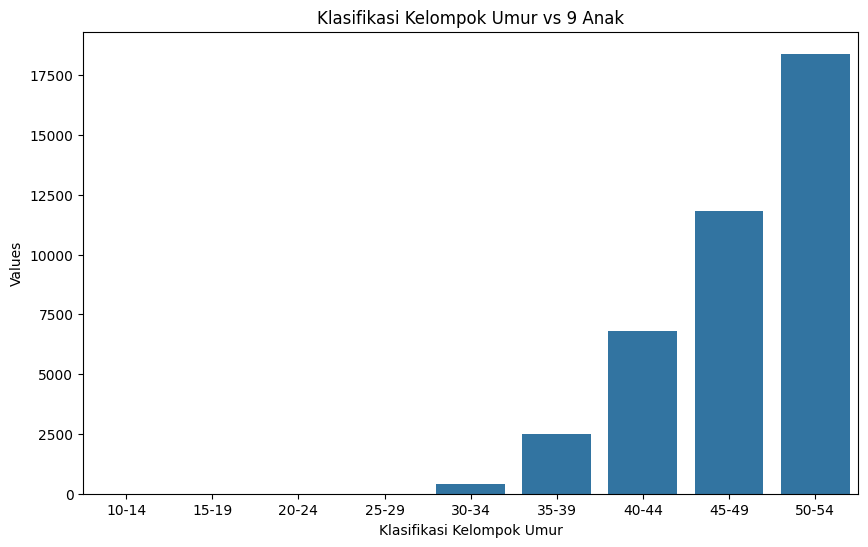

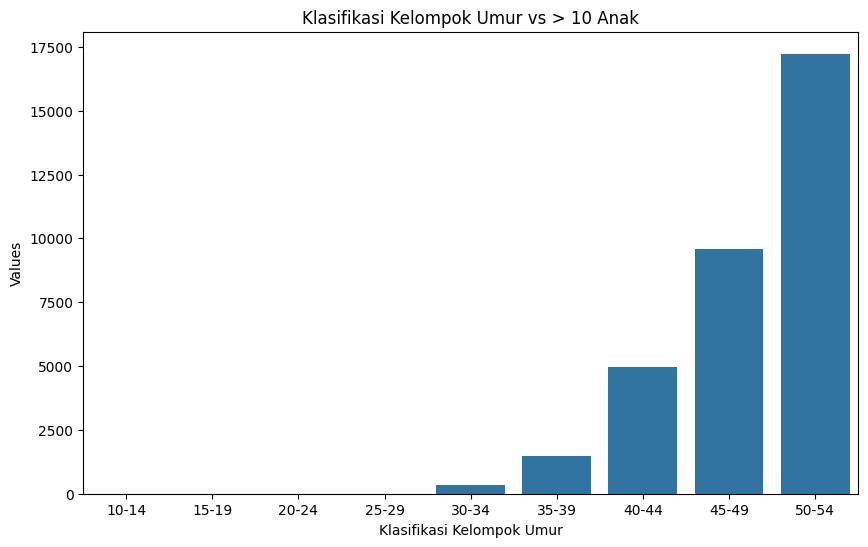

In [49]:
# Misalkan Anda memiliki beberapa kolom yang ingin diplot
columns_to_plot = ['1 Anak', '2 Anak', '3 Anak', '4 Anak', '5 Anak', '6 Anak', '7 Anak', '8 Anak', '9 Anak', '> 10 Anak']  # Ganti dengan nama kolom yang ingin Anda plot

# Loop melalui setiap kolom yang akan diplot
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(data_kelahiran['Klasifikasi Kelompok Umur']), y=list(data_kelahiran[column]))
    plt.xlabel('Klasifikasi Kelompok Umur')
    plt.ylabel('Values')
    plt.title(f'Klasifikasi Kelompok Umur vs {column}')
    plt.show()

In [50]:
# Menghitung total kelahiran per kelompok umur
data_kelahiran['Kelahiran'] = (data_kelahiran['1 Anak'] + data_kelahiran['2 Anak'] + data_kelahiran['3 Anak'] +
                                    data_kelahiran['4 Anak'] + data_kelahiran['5 Anak'] + data_kelahiran['6 Anak'] +
                                    data_kelahiran['7 Anak'] + data_kelahiran['8 Anak'] + data_kelahiran['9 Anak'] +
                                    data_kelahiran['> 10 Anak'])

# Menyimpan hanya kolom yang diperlukan
data_kelahiran = data_kelahiran[['Klasifikasi Kelompok Umur', 'Keguguran', 'Kelahiran']]

data_kelahiran

,Klasifikasi Kelompok Umur,Keguguran,Kelahiran
0,10-14,10730557,1871
1,15-19,10519155,211427
2,20-24,8159938,2777388
3,25-29,3731007,7246940
4,30-34,1530754,9320644
5,35-39,883775,9620933
6,40-44,703785,9384307
7,45-49,704784,8643990
8,50-54,761158,7498408


In [56]:
data_kelahiran['Rasio Keguguran terhadap Kelahiran'] = (data_kelahiran['Keguguran'] / data_kelahiran['Kelahiran']).round(2)
data_kelahiran


,Klasifikasi Kelompok Umur,Keguguran,Kelahiran,Rasio Keguguran terhadap Kelahiran
0,10-14,10730557,1871,5735.20
1,15-19,10519155,211427,49.75
2,20-24,8159938,2777388,2.94
3,25-29,3731007,7246940,0.51
4,30-34,1530754,9320644,0.16
5,35-39,883775,9620933,0.09
6,40-44,703785,9384307,0.07
7,45-49,704784,8643990,0.08
8,50-54,761158,7498408,0.10


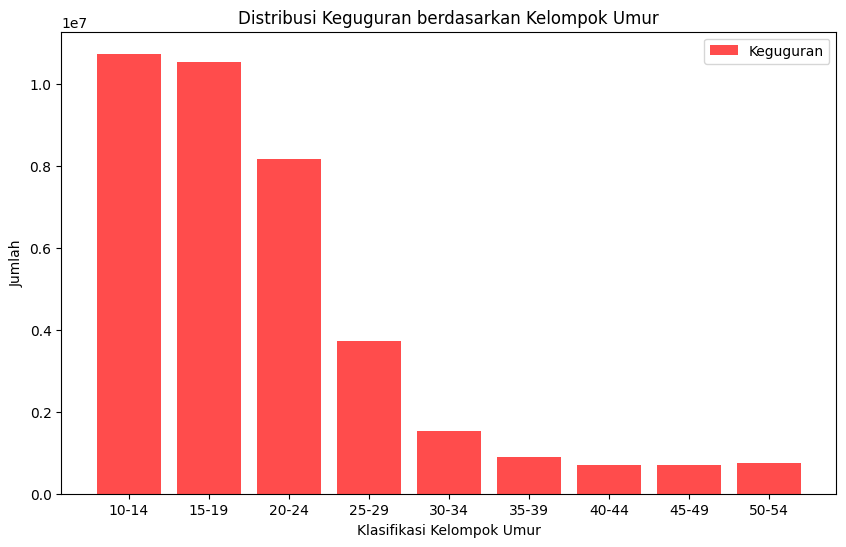

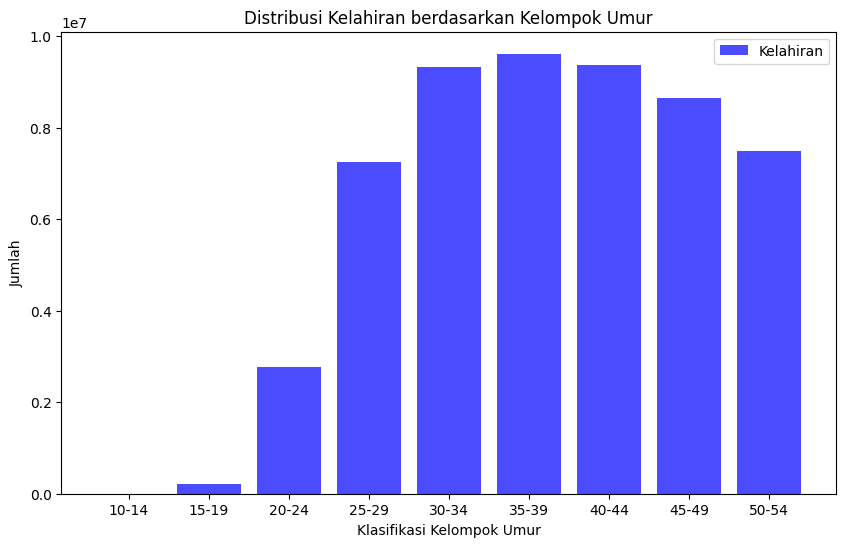

In [57]:

# Bar plot untuk distribusi keguguran
plt.figure(figsize=(10, 6))
plt.bar(data_kelahiran['Klasifikasi Kelompok Umur'], data_kelahiran['Keguguran'], color='red', alpha=0.7, label='Keguguran')
plt.xlabel('Klasifikasi Kelompok Umur')
plt.ylabel('Jumlah')
plt.title('Distribusi Keguguran berdasarkan Kelompok Umur')
plt.legend()
plt.show()

# Bar plot untuk distribusi kelahiran
plt.figure(figsize=(10, 6))
plt.bar(data_kelahiran['Klasifikasi Kelompok Umur'], data_kelahiran['Kelahiran'], color='blue', alpha=0.7, label='Kelahiran')
plt.xlabel('Klasifikasi Kelompok Umur')
plt.ylabel('Jumlah')
plt.title('Distribusi Kelahiran berdasarkan Kelompok Umur')
plt.legend()
plt.show()

In [58]:
correlation = data_kelahiran[['Keguguran', 'Kelahiran']].corr()
print(correlation)

           Keguguran  Kelahiran
Keguguran   1.000000  -0.980518
Kelahiran  -0.980518   1.000000


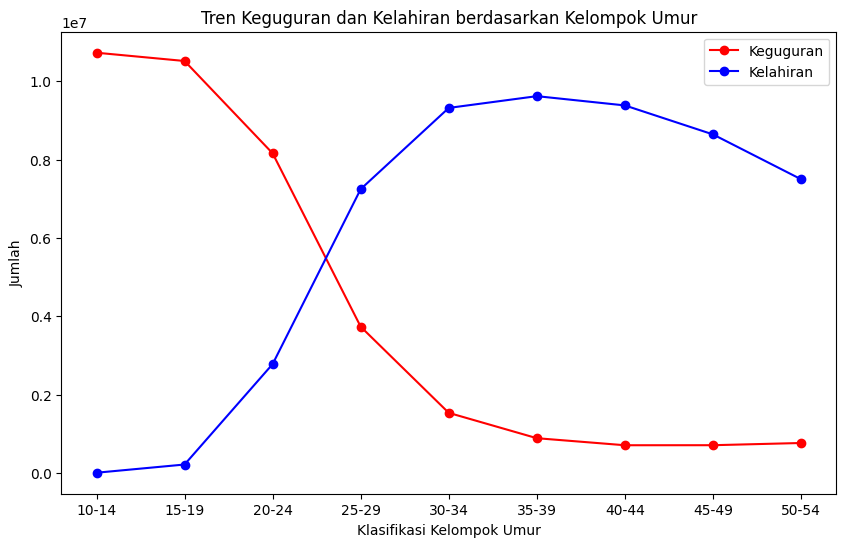

In [59]:
# Plot tren keguguran dan kelahiran berdasarkan kelompok umur
plt.figure(figsize=(10, 6))
plt.plot(data_kelahiran['Klasifikasi Kelompok Umur'], data_kelahiran['Keguguran'], marker='o', color='red', label='Keguguran')
plt.plot(data_kelahiran['Klasifikasi Kelompok Umur'], data_kelahiran['Kelahiran'], marker='o', color='blue', label='Kelahiran')
plt.xlabel('Klasifikasi Kelompok Umur')
plt.ylabel('Jumlah')
plt.title('Tren Keguguran dan Kelahiran berdasarkan Kelompok Umur')
plt.legend()
plt.show()

### Deep Analysis Poisson dan Binomial Negatif Regression

In [60]:
# Mengonversi Klasifikasi Kelompok Umur ke variabel dummy
data_kelahiran = pd.get_dummies(data_kelahiran, columns=['Klasifikasi Kelompok Umur'], drop_first=True)

data_kelahiran.head()

,Keguguran,Kelahiran,Rasio Keguguran terhadap Kelahiran,Klasifikasi Kelompok Umur_15-19,Klasifikasi Kelompok Umur_20-24,Klasifikasi Kelompok Umur_25-29,Klasifikasi Kelompok Umur_30-34,Klasifikasi Kelompok Umur_35-39,Klasifikasi Kelompok Umur_40-44,Klasifikasi Kelompok Umur_45-49,Klasifikasi Kelompok Umur_50-54
0,10730557,1871,5735.20,False,False,False,False,False,False,False,False
1,10519155,211427,49.75,True,False,False,False,False,False,False,False
2,8159938,2777388,2.94,False,True,False,False,False,False,False,False
3,3731007,7246940,0.51,False,False,True,False,False,False,False,False
4,1530754,9320644,0.16,False,False,False,True,False,False,False,False


In [61]:
# Menghapus kolom 'Rasio Keguguran terhadap Kelahiran'
drop_data_kelahiran = data_kelahiran.drop(columns=['Rasio Keguguran terhadap Kelahiran'])
drop_data_kelahiran

,Keguguran,Kelahiran,Klasifikasi Kelompok Umur_15-19,Klasifikasi Kelompok Umur_20-24,Klasifikasi Kelompok Umur_25-29,Klasifikasi Kelompok Umur_30-34,Klasifikasi Kelompok Umur_35-39,Klasifikasi Kelompok Umur_40-44,Klasifikasi Kelompok Umur_45-49,Klasifikasi Kelompok Umur_50-54
0,10730557,1871,False,False,False,False,False,False,False,False
1,10519155,211427,True,False,False,False,False,False,False,False
2,8159938,2777388,False,True,False,False,False,False,False,False
3,3731007,7246940,False,False,True,False,False,False,False,False
4,1530754,9320644,False,False,False,True,False,False,False,False
5,883775,9620933,False,False,False,False,True,False,False,False
6,703785,9384307,False,False,False,False,False,True,False,False
7,704784,8643990,False,False,False,False,False,False,True,False
8,761158,7498408,False,False,False,False,False,False,False,True


In [62]:
from sklearn.preprocessing import LabelEncoder

# Ubah Variable Name
data_kelahiran = drop_data_kelahiran

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Pilih Kolom yang dilakukan label encoder
data_kelahiran['Klasifikasi Kelompok Umur_15-19'] = label_encoder.fit_transform(data_kelahiran['Klasifikasi Kelompok Umur_15-19'])
data_kelahiran['Klasifikasi Kelompok Umur_20-24'] = label_encoder.fit_transform(data_kelahiran['Klasifikasi Kelompok Umur_20-24'])
data_kelahiran['Klasifikasi Kelompok Umur_25-29'] = label_encoder.fit_transform(data_kelahiran['Klasifikasi Kelompok Umur_25-29'])
data_kelahiran['Klasifikasi Kelompok Umur_30-34'] = label_encoder.fit_transform(data_kelahiran['Klasifikasi Kelompok Umur_30-34'])
data_kelahiran['Klasifikasi Kelompok Umur_35-39'] = label_encoder.fit_transform(data_kelahiran['Klasifikasi Kelompok Umur_35-39'])
data_kelahiran['Klasifikasi Kelompok Umur_40-44'] = label_encoder.fit_transform(data_kelahiran['Klasifikasi Kelompok Umur_40-44'])
data_kelahiran['Klasifikasi Kelompok Umur_45-49'] = label_encoder.fit_transform(data_kelahiran['Klasifikasi Kelompok Umur_45-49'])
data_kelahiran['Klasifikasi Kelompok Umur_50-54'] = label_encoder.fit_transform(data_kelahiran['Klasifikasi Kelompok Umur_50-54'])

In [63]:
data_kelahiran

,Keguguran,Kelahiran,Klasifikasi Kelompok Umur_15-19,Klasifikasi Kelompok Umur_20-24,Klasifikasi Kelompok Umur_25-29,Klasifikasi Kelompok Umur_30-34,Klasifikasi Kelompok Umur_35-39,Klasifikasi Kelompok Umur_40-44,Klasifikasi Kelompok Umur_45-49,Klasifikasi Kelompok Umur_50-54
0,10730557,1871,0,0,0,0,0,0,0,0
1,10519155,211427,1,0,0,0,0,0,0,0
2,8159938,2777388,0,1,0,0,0,0,0,0
3,3731007,7246940,0,0,1,0,0,0,0,0
4,1530754,9320644,0,0,0,1,0,0,0,0
5,883775,9620933,0,0,0,0,1,0,0,0
6,703785,9384307,0,0,0,0,0,1,0,0
7,704784,8643990,0,0,0,0,0,0,1,0
8,761158,7498408,0,0,0,0,0,0,0,1


In [65]:
import statsmodels.api as sm
import numpy as np

# Menentukan variabel independen (X) dan dependen (y)
X = data_kelahiran.drop(columns=['Keguguran'])
y = data_kelahiran['Keguguran']

# Menambahkan intercept ke model
X = sm.add_constant(X)

# Membuat dan menyesuaikan model regresi Poisson
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Menampilkan ringkasan hasil model
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Keguguran   No. Observations:                    9
Model:                            GLM   Df Residuals:                        0
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -74.175
Date:                Thu, 01 Aug 2024   Deviance:                   5.1411e-09
Time:                        16:46:31   Pearson chi2:                 2.20e-09
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [66]:
import statsmodels.api as sm

# Menentukan variabel independen (X) dan dependen (y)
X = data_kelahiran.drop(columns=['Keguguran'])
y = data_kelahiran['Keguguran']

# Menambahkan intercept ke model
X = sm.add_constant(X)

# Membuat dan menyesuaikan model regresi Binomial Negatif
negative_binomial_model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

# Menampilkan ringkasan hasil model
print(negative_binomial_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Keguguran   No. Observations:                    9
Model:                            GLM   Df Residuals:                        0
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -140.81
Date:                Thu, 01 Aug 2024   Deviance:                  -6.7619e-10
Time:                        16:46:32   Pearson chi2:                 1.10e-15
No. Iterations:                     5   Pseudo R-squ. (CS):             0.7006
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

c:\Users\restu\OneDrive\Documents\Project\Studi Data Science\Indonesia  Population Growth Rate Analisis\env\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
